In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.stats import norm

# 데이터 로드
data = pd.read_csv("C:/Users/andyj/Desktop/new_file/기후_데이터/SURFACE_ASOS_108_DAY_2023_2023_2024/SURFACE_ASOS_108_DAY_2023_2023_2024.csv", encoding='euc-kr')

# 일시 컬럼을 datetime 형식으로 변환
data['일시'] = pd.to_datetime(data['일시'], errors='coerce')  # 일시 컬럼을 datetime 형식으로 변환하고, 변환이 안되는 값은 NaT로 처리

# 날짜만 추출하여 새로운 컬럼에 저장 (옵션)
data['날짜'] = data['일시'].dt.date  # 날짜 정보만 추출하여 '날짜' 컬럼에 저장

# 숫자형 컬럼만 선택
numeric_data = data.select_dtypes(include=[np.number])

# 결측값 처리: 각 열의 결측값을 해당 열의 평균값으로 채우기
numeric_data.fillna(numeric_data.mean(), inplace=True)

# 결측값이 채워진 숫자형 데이터로 다시 데이터프레임을 업데이트
data[numeric_data.columns] = numeric_data

# 특성 및 목표 변수 설정
target = '일강수량(mm)'
features = [
    '평균기온(°C)',
    '평균 상대습도(%)',
    '평균 풍속(m/s)',
    '평균 증기압(hPa)',
    '최고기온(°C)',
    '최고 해면기압(hPa)',
    '합계 일사량(MJ/m2)',
    '평균 이슬점온도(°C)',
    '평균 전운량(1/10)'
]

# 특성과 목표 변수 분리
X = data[features]
y = data[target]

# 회귀 모델을 이용한 강수량 예측 (예: Linear Regression)
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# 예측된 강수량에 대한 표준 오차 계산 (단순히 예시)
y_residuals = y - y_pred
std_error = np.std(y_residuals)

# 신뢰도 구간 계산 (95% 신뢰도)
z_score = norm.ppf(0.975)  # 95% 신뢰도 구간의 Z 점수
confidence_interval = z_score * std_error

# 예측값에 대해 신뢰도 구간 설정
lower_bound = y_pred - confidence_interval
upper_bound = y_pred + confidence_interval

# 실제 강수 여부 확인 (예: 강수량이 0보다 큰 경우 비가 옴)
rain_observed = (y > 0)

# 예측이 맞은 경우(정확도 계산)
correct_predictions = ((y_pred >= lower_bound) & (y_pred <= upper_bound) & rain_observed)
accuracy = np.mean(correct_predictions)

# 결과 출력
print(f"Accuracy: {accuracy * 100:.5f}%")


Accuracy: 88.76712%


In [ ]:
print(X.describe())


         평균기온(°C)  평균 상대습도(%)  평균 풍속(m/s)  평균 증기압(hPa)    최고기온(°C)  \
count  365.000000  365.000000  363.000000   365.000000  365.000000   
mean    14.109041   66.681644    2.270799    13.288219   18.800000   
std     10.572377   14.803802    0.616599     9.016895   10.449026   
min    -14.700000   22.900000    1.100000     1.000000   -8.000000   
25%      5.000000   56.100000    1.800000     5.300000    9.300000   
50%     15.800000   67.300000    2.200000    10.700000   21.200000   
75%     23.300000   76.600000    2.500000    21.200000   27.300000   
max     30.900000   99.100000    5.400000    31.900000   35.800000   

       최고 해면기압(hPa)  합계 일사량(MJ/m2)  평균 이슬점온도(°C)  평균 전운량(1/10)  
count    365.000000     364.000000    365.000000    365.000000  
mean    1018.362466      14.247253      7.389589      4.852877  
std        8.806675       7.423654     11.786235      3.109419  
min      998.400000       0.690000    -22.500000      0.000000  
25%     1011.500000       8.930000     -2.10

In [ ]:
print(data.columns)


Index(['지점', '일시', '평균기온(°C)', '최저기온(°C)', '최저기온 시각(hhmi)', '최고기온(°C)',
       '최고기온 시각(hhmi)', '강수 계속시간(hr)', '10분 최다 강수량(mm)', '10분 최다강수량 시각(hhmi)',
       '1시간 최다강수량(mm)', '1시간 최다 강수량 시각(hhmi)', '일강수량(mm)', '최대 순간 풍속(m/s)',
       '최대 순간 풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '평균 풍속(m/s)', '풍정합(100m)', '평균 이슬점온도(°C)',
       '최소 상대습도(%)', '최소 상대습도 시각(hhmi)', '평균 상대습도(%)', '평균 증기압(hPa)',
       '평균 현지기압(hPa)', '최고 해면기압(hPa)', '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)',
       '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)', '가조시간(hr)', '합계 일조시간(hr)',
       '1시간 최다일사 시각(hhmi)', '1시간 최다일사량(MJ/m2)', '합계 일사량(MJ/m2)', '일 최심신적설(cm)',
       '일 최심신적설 시각(hhmi)', '일 최심적설(cm)', '일 최심적설 시각(hhmi)', '합계 3시간 신적설(cm)',
       '평균 전운량(1/10)', '평균 중하층운량(1/10)', '평균 지면온도(°C)', '최저 초상온도(°C)',
       '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)', '평균 20cm 지중온도(°C)',
       '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)', '1.0m 지중온도(°C)', '1.5m 지중온도(°C)',
       '3.0m 지중온도(°C)', '5.0m 지중온도(°C

In [ ]:
import pandas as pd
import numpy as np

# 데이터 읽기
data = pd.read_csv("C:/Users/andyj/Desktop/new_file/기후_데이터/SURFACE_ASOS_108_DAY_2023_2023_2024/SURFACE_ASOS_108_DAY_2023_2023_2024.csv", encoding='euc-kr')

# 일시 컬럼을 datetime 형식으로 변환
data['일시'] = pd.to_datetime(data['일시'], errors='coerce')  # 일시 컬럼을 datetime 형식으로 변환하고, 변환이 안되는 값은 NaT로 처리

# 숫자형 데이터만 선택
numeric_data = data.select_dtypes(include=[np.number])

# 숫자형 데이터에서 결측값을 평균으로 채우기
numeric_data.fillna(numeric_data.mean(), inplace=True)

# 결측값이 채워진 숫자형 데이터로 다시 데이터프레임을 업데이트
data[numeric_data.columns] = numeric_data

# 결과 확인
print(data.head())


    지점         일시  평균기온(°C)  최저기온(°C)  최저기온 시각(hhmi)  최고기온(°C)  최고기온 시각(hhmi)  \
0  108 2023-01-01      -0.2      -4.3           2350       3.8           1343   
1  108 2023-01-02      -4.5      -7.4            804      -0.4           1525   
2  108 2023-01-03      -5.0      -9.0            551       0.6           1555   
3  108 2023-01-04      -1.8      -5.7            229       3.3           1510   
4  108 2023-01-05      -1.6      -5.6            749       3.6           1536   

   강수 계속시간(hr)  10분 최다 강수량(mm)  10분 최다강수량 시각(hhmi)  ...  평균 30cm 지중온도(°C)  \
0     7.311141           2.528         1129.867647  ...               0.6   
1     7.311141           2.528         1129.867647  ...               0.6   
2     7.311141           2.528         1129.867647  ...               0.5   
3     7.311141           2.528         1129.867647  ...               0.3   
4     7.311141           2.528         1129.867647  ...               0.2   

   0.5m 지중온도(°C)  1.0m 지중온도(°C)  1.5m 지중온도(°C)  3.

In [ ]:
import os
print(os.getcwd())  # 현재 작업 디렉터리 출력


c:\Users\andyj\Desktop\new_file


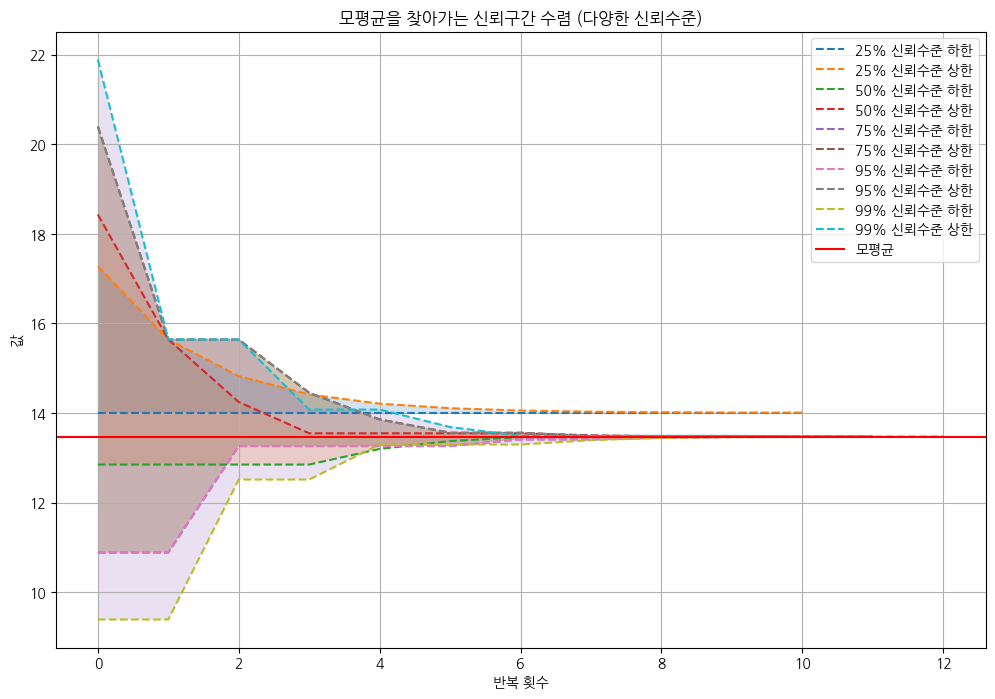


신뢰수준: 25.0%
표본 평균: 15.64
모평균: 13.47
신뢰구간: (14.01, 17.27)
모평균을 맞추는데 필요한 반복 횟수: 10

신뢰수준: 50.0%
표본 평균: 15.64
모평균: 13.47
신뢰구간: (12.85, 18.43)
모평균을 맞추는데 필요한 반복 횟수: 11

신뢰수준: 75.0%
표본 평균: 15.64
모평균: 13.47
신뢰구간: (10.89, 20.39)
모평균을 맞추는데 필요한 반복 횟수: 11

신뢰수준: 95.0%
표본 평균: 15.64
모평균: 13.47
신뢰구간: (10.89, 20.39)
모평균을 맞추는데 필요한 반복 횟수: 11

신뢰수준: 99.0%
표본 평균: 15.64
모평균: 13.47
신뢰구간: (9.39, 21.89)
모평균을 맞추는데 필요한 반복 횟수: 12


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 데이터 로드
file_path = "C:/Users/andyj/Desktop/new_file/기후_데이터/SURFACE_ASOS_108_DAY_2023_2023_2024/SURFACE_ASOS_108_DAY_2023_2023_2024.csv"
data = pd.read_csv(file_path, encoding='euc-kr')

# 필요한 열 추출
columns_to_use = [
    '평균기온(°C)', '평균 현지기압(hPa)', '평균 풍속(m/s)', '일강수량(mm)'
]
data = data[columns_to_use]

# 데이터 전처리
data = data.dropna()
data = data[data['일강수량(mm)'] > 0]

# 분석 범위 설정
data_range = {
    '평균기온(°C)': (15, 20),
    '평균 현지기압(hPa)': (1000, 1010),
    '평균 풍속(m/s)': (1, 3)
}

# 샘플 추출 함수
def extract_samples(data, column, range_min, range_max, num_samples=30):
    filtered_data = data[(data[column] >= range_min) & (data[column] <= range_max)]
    return np.random.choice(filtered_data['일강수량(mm)'], num_samples, replace=True)

# 표본 평균 계산
def calculate_sample_mean(samples):
    return np.mean(samples)

# 모평균 계산
def calculate_population_mean(data, column, range_min, range_max):
    filtered_data = data[(data[column] >= range_min) & (data[column] <= range_max)]
    return np.mean(filtered_data['일강수량(mm)'])

# 신뢰구간 계산 함수
def calculate_confidence_interval(data, confidence_level):
    mean = np.mean(data)
    std_dev = np.std(data)
    z_scores = {
        0.25: 0.674,   # 25% 신뢰수준
        0.50: 1.150,   # 50% 신뢰수준
        0.75: 1.960,   # 75% 신뢰수준
        0.95: 1.960,   # 95% 신뢰수준
        0.99: 2.576    # 99% 신뢰수준
    }
    z_score = z_scores[confidence_level]
    margin_of_error = z_score * (std_dev / np.sqrt(len(data)))
    return mean - margin_of_error, mean + margin_of_error

# 정확도 평가 함수 (반복할 때마다 신뢰구간을 기록)
def evaluate_accuracy_with_plot(conf_interval, population_mean, max_iterations=100, precision=0.0001):
    left, right = conf_interval
    iterations = 0
    conf_intervals = [(left, right)]  # 신뢰구간을 기록할 리스트

    while iterations < max_iterations:
        mid = (left + right) / 2
        if population_mean < mid:
            right = mid
        else:
            left = mid
        iterations += 1
        conf_intervals.append((left, right))  # 신뢰구간 업데이트
        
        # 신뢰구간의 절반에서 모평균이 포함되면 멈춤
        if round(right - left, 2) <= precision:
            break
    
    return conf_intervals

# 9. 정확도 평가 함수
def evaluate_accuracy(conf_interval, population_mean, max_iterations=500, precision=0.0001):
    left, right = conf_interval
    iterations = 0
    while iterations < max_iterations:
        mid = (left + right) / 2
        if population_mean < mid:
            right = mid
        else:
            left = mid
        iterations += 1
        # 신뢰구간의 절반에서 모평균이 포함되면 멈춤, precision(정밀도) 이하로 간격을 좁힘
        if round(right - left, 2) <= precision:
            break
    return iterations


# 알고리즘 실행
samples = extract_samples(data, '평균기온(°C)', data_range['평균기온(°C)'][0], data_range['평균기온(°C)'][1])
sample_mean = calculate_sample_mean(samples)
population_mean = calculate_population_mean(data, '평균기온(°C)', data_range['평균기온(°C)'][0], data_range['평균기온(°C)'][1])

# 신뢰수준 리스트
confidence_levels = [0.25, 0.50, 0.75, 0.95, 0.99]

# 각 신뢰수준에 대해 신뢰구간을 시각화
plt.figure(figsize=(12, 8))

for confidence_level in confidence_levels:
    confidence_interval = calculate_confidence_interval(samples, confidence_level)
    conf_intervals = evaluate_accuracy_with_plot(confidence_interval, population_mean)

    # 반복 횟수에 따른 신뢰구간 변화
    iterations = len(conf_intervals)
    x = np.arange(iterations)
    lower_bounds = [conf[0] for conf in conf_intervals]
    upper_bounds = [conf[1] for conf in conf_intervals]

    plt.plot(x, lower_bounds, label=f'{int(confidence_level*100)}% 신뢰수준 하한', linestyle='--')
    plt.plot(x, upper_bounds, label=f'{int(confidence_level*100)}% 신뢰수준 상한', linestyle='--')
    plt.fill_between(x, lower_bounds, upper_bounds, alpha=0.2)  # 신뢰구간 색상

# 모평균 시각화
plt.axhline(y=population_mean, color='red', label='모평균', linestyle='-')

plt.title("모평균을 찾아가는 신뢰구간 수렴 (다양한 신뢰수준)")
plt.xlabel("반복 횟수")
plt.ylabel("값")
plt.legend()
plt.grid(True)
plt.show()

# 각 신뢰수준에 대해 결과를 계산하고 출력
for confidence_level in confidence_levels:
    confidence_interval = calculate_confidence_interval(samples, confidence_level)
    iterations = evaluate_accuracy(confidence_interval, population_mean)
    
    print(f"\n신뢰수준: {confidence_level * 100}%")
    print("표본 평균:", round(sample_mean, 2))
    print("모평균:", round(population_mean, 2))
    print("신뢰구간:", (round(confidence_interval[0], 2), round(confidence_interval[1], 2)))
    print("모평균을 맞추는데 필요한 반복 횟수:", iterations)


5번 반복 후 각 신뢰수준에 대한 평균 효용성:
신뢰수준 25.0% 평균 효용성: 0.0304
신뢰수준 50.0% 평균 효용성: 0.0555
신뢰수준 75.0% 평균 효용성: 0.0776
신뢰수준 95.0% 평균 효용성: 0.0983
신뢰수준 99.0% 평균 효용성: 0.0827


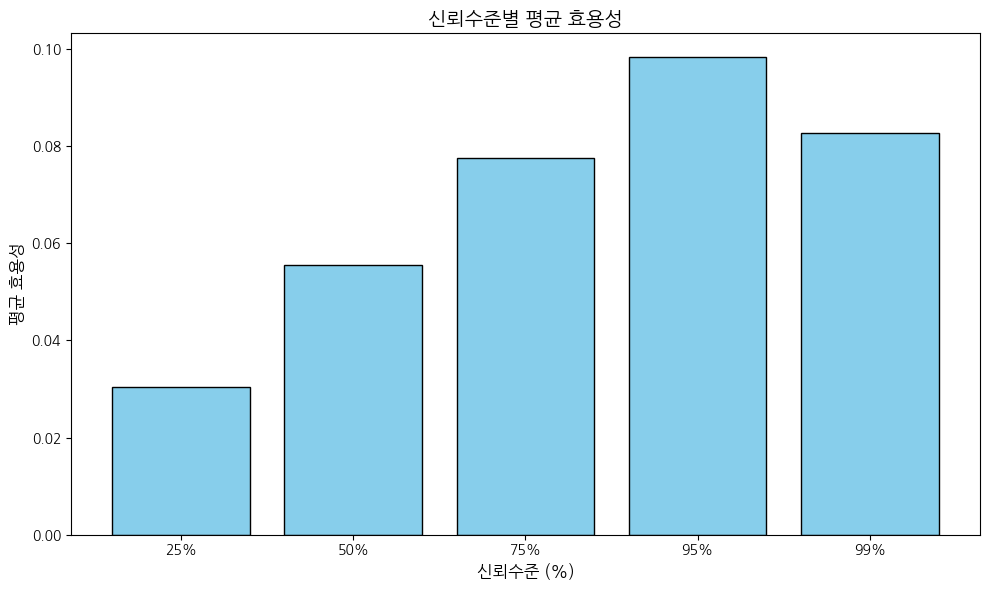

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib


# 데이터 로드
file_path = "C:/Users/andyj/Desktop/new_file/기후_데이터/SURFACE_ASOS_108_DAY_2023_2023_2024/SURFACE_ASOS_108_DAY_2023_2023_2024.csv"
data = pd.read_csv(file_path, encoding='euc-kr')

# 필요한 열 추출
columns_to_use = [
    '평균기온(°C)', '평균 현지기압(hPa)', '평균 풍속(m/s)', '일강수량(mm)'
]
data = data[columns_to_use]

# 데이터 전처리
data = data.dropna()
data = data[data['일강수량(mm)'] > 0]

# 분석 범위 설정
data_range = {
    '평균기온(°C)': (15, 20),
    '평균 현지기압(hPa)': (1000, 1010),
    '평균 풍속(m/s)': (1, 3)
}

# 샘플 추출 함수
def extract_samples(data, column, range_min, range_max, num_samples=30):
    filtered_data = data[(data[column] >= range_min) & (data[column] <= range_max)]
    return np.random.choice(filtered_data['일강수량(mm)'], num_samples, replace=True)

# 표본 평균 계산
def calculate_sample_mean(samples):
    return np.mean(samples)

# 모평균 계산
def calculate_population_mean(data, column, range_min, range_max):
    filtered_data = data[(data[column] >= range_min) & (data[column] <= range_max)]
    return np.mean(filtered_data['일강수량(mm)'])

# 신뢰구간 계산 함수
def calculate_confidence_interval(data, confidence_level):
    mean = np.mean(data)
    std_dev = np.std(data)
    z_scores = {
        0.25: 0.674,   # 25% 신뢰수준
        0.50: 1.150,   # 50% 신뢰수준
        0.75: 1.960,   # 75% 신뢰수준
        0.95: 1.960,   # 95% 신뢰수준
        0.99: 2.576    # 99% 신뢰수준
    }
    z_score = z_scores[confidence_level]
    margin_of_error = z_score * (std_dev / np.sqrt(len(data)))
    return mean - margin_of_error, mean + margin_of_error

# 반복 횟수 평가 + 페널티 계산 (확률에 기반한 반복 횟수 계산)
def evaluate_iterations_and_penalty(conf_interval, population_mean, max_iterations=500, precision=0.0001):
    # 신뢰구간 길이 계산
    interval_length = conf_interval[1] - conf_interval[0]
    
    # 길이에 비례하는 확률 계산 (길이가 길수록 낮은 확률)
    probability = 1 / interval_length  # 길이가 길수록 확률은 낮음
    
    # 기하 분포를 따르는 기댓값을 사용하여 반복 횟수 계산
    expected_iterations = 1 / probability
    
    iterations = round(expected_iterations)
    penalty = 0

    # 모평균이 신뢰구간에 들어가지 않을 경우 페널티 부여
    if not (conf_interval[0] <= population_mean <= conf_interval[1]):
        penalty = 1

    return iterations, penalty


# 효용성 계산 함수
def calculate_efficiency(confidence_level, iterations, penalty):
    if iterations == 0:  # 반복 횟수가 0이면 효용성 계산 방지
        return 0
    return confidence_level * (1 / iterations) * (1 - penalty)

# 5번 반복하여 결과 계산
repeat_count = 100
all_results = {0.25: [], 0.50: [], 0.75: [], 0.95: [], 0.99: []}  # 신뢰수준별 결과 저장

for repeat in range(repeat_count):
    samples = extract_samples(data, '평균기온(°C)', data_range['평균기온(°C)'][0], data_range['평균기온(°C)'][1])
    sample_mean = calculate_sample_mean(samples)
    population_mean = calculate_population_mean(data, '평균기온(°C)', data_range['평균기온(°C)'][0], data_range['평균기온(°C)'][1])

    # 신뢰수준 리스트
    confidence_levels = [0.25, 0.50, 0.75, 0.95, 0.99]
    results = []

    for confidence_level in confidence_levels:
        confidence_interval = calculate_confidence_interval(samples, confidence_level)
        iterations, penalty = evaluate_iterations_and_penalty(confidence_interval, population_mean)
        efficiency = calculate_efficiency(confidence_level, iterations, penalty)

        results.append((confidence_level, iterations, penalty, efficiency))
        all_results[confidence_level].append(efficiency)  # 신뢰수준별 효용성 기록

    # # 결과 출력
    # print(f"\n반복 {repeat + 1}:")
    # for confidence_level, iterations, penalty, efficiency in results:
    #     print(f"신뢰수준: {confidence_level * 100}%")
    #     print("신뢰구간:", (round(confidence_interval[0], 2), round(confidence_interval[1], 2)))
    #     print("모평균:", round(population_mean, 2))
    #     print("반복 횟수:", iterations)
    #     print("페널티:", penalty)
    #     print("효용성:", round(efficiency, 4))
    #     print("\n")

    # # 최종 효용성이 높은 신뢰수준
    # best_result = max(results, key=lambda x: x[3])
    # print(f"가장 높은 효용성을 가진 신뢰수준: {int(best_result[0] * 100)}%")

# 5번 반복 후 각 신뢰수준에 대해 평균 효용성 계산
print("\n100번 반복 후 각 신뢰수준에 대한 평균 효용성:")
for confidence_level in confidence_levels:
    avg_efficiency = np.mean(all_results[confidence_level])
    print(f"신뢰수준 {confidence_level * 100}% 평균 효용성: {avg_efficiency:.4f}")



# 각 신뢰수준별로 5번 반복한 효용성 값을 리스트로 저장
efficiency_means = {confidence_level: np.mean(all_results[confidence_level]) for confidence_level in confidence_levels}

# 신뢰수준과 효용성 값 리스트로 변환
confidence_levels_list = [f'{int(conf_level * 100)}%' for conf_level in confidence_levels]
efficiency_values_list = list(efficiency_means.values())

# 막대그래프 시각화
plt.figure(figsize=(10, 6))
plt.bar(confidence_levels_list, efficiency_values_list, color='skyblue', edgecolor='black')

# 그래프 제목과 레이블
plt.title('신뢰수준별 평균 효용성', fontsize=14)
plt.xlabel('신뢰수준 (%)', fontsize=12)
plt.ylabel('평균 효용성', fontsize=12)

# 그래프 출력
plt.tight_layout()
plt.show()



100번 반복 후 각 신뢰수준에 대한 평균 효용성:
신뢰수준 1% 평균 효용성: 0.0000
신뢰수준 2% 평균 효용성: 0.0000
신뢰수준 3% 평균 효용성: 0.0000
신뢰수준 4% 평균 효용성: 0.0000
신뢰수준 5% 평균 효용성: 0.0000
신뢰수준 6% 평균 효용성: 0.0000
신뢰수준 7% 평균 효용성: 0.0000
신뢰수준 8% 평균 효용성: 0.0016
신뢰수준 9% 평균 효용성: 0.0063
신뢰수준 10% 평균 효용성: 0.0070
신뢰수준 11% 평균 효용성: 0.0088
신뢰수준 12% 평균 효용성: 0.0108
신뢰수준 13% 평균 효용성: 0.0130
신뢰수준 14% 평균 효용성: 0.0140
신뢰수준 15% 평균 효용성: 0.0150
신뢰수준 16% 평균 효용성: 0.0160
신뢰수준 17% 평균 효용성: 0.0187
신뢰수준 18% 평균 효용성: 0.0216
신뢰수준 19% 평균 효용성: 0.0266
신뢰수준 20% 평균 효용성: 0.0300
신뢰수준 21% 평균 효용성: 0.0315
신뢰수준 22% 평균 효용성: 0.0330
신뢰수준 23% 평균 효용성: 0.0357
신뢰수준 24% 평균 효용성: 0.0288
신뢰수준 25% 평균 효용성: 0.0262
신뢰수준 26% 평균 효용성: 0.0234
신뢰수준 27% 평균 효용성: 0.0257
신뢰수준 28% 평균 효용성: 0.0266
신뢰수준 29% 평균 효용성: 0.0304
신뢰수준 30% 평균 효용성: 0.0330
신뢰수준 31% 평균 효용성: 0.0357
신뢰수준 32% 평균 효용성: 0.0352
신뢰수준 33% 평균 효용성: 0.0363
신뢰수준 34% 평균 효용성: 0.0408
신뢰수준 35% 평균 효용성: 0.0420
신뢰수준 36% 평균 효용성: 0.0432
신뢰수준 37% 평균 효용성: 0.0450
신뢰수준 38% 평균 효용성: 0.0450
신뢰수준 39% 평균 효용성: 0.0513
신뢰수준 40% 평균 효용성: 0.0507
신뢰수준 41% 평균 효용성: 0.

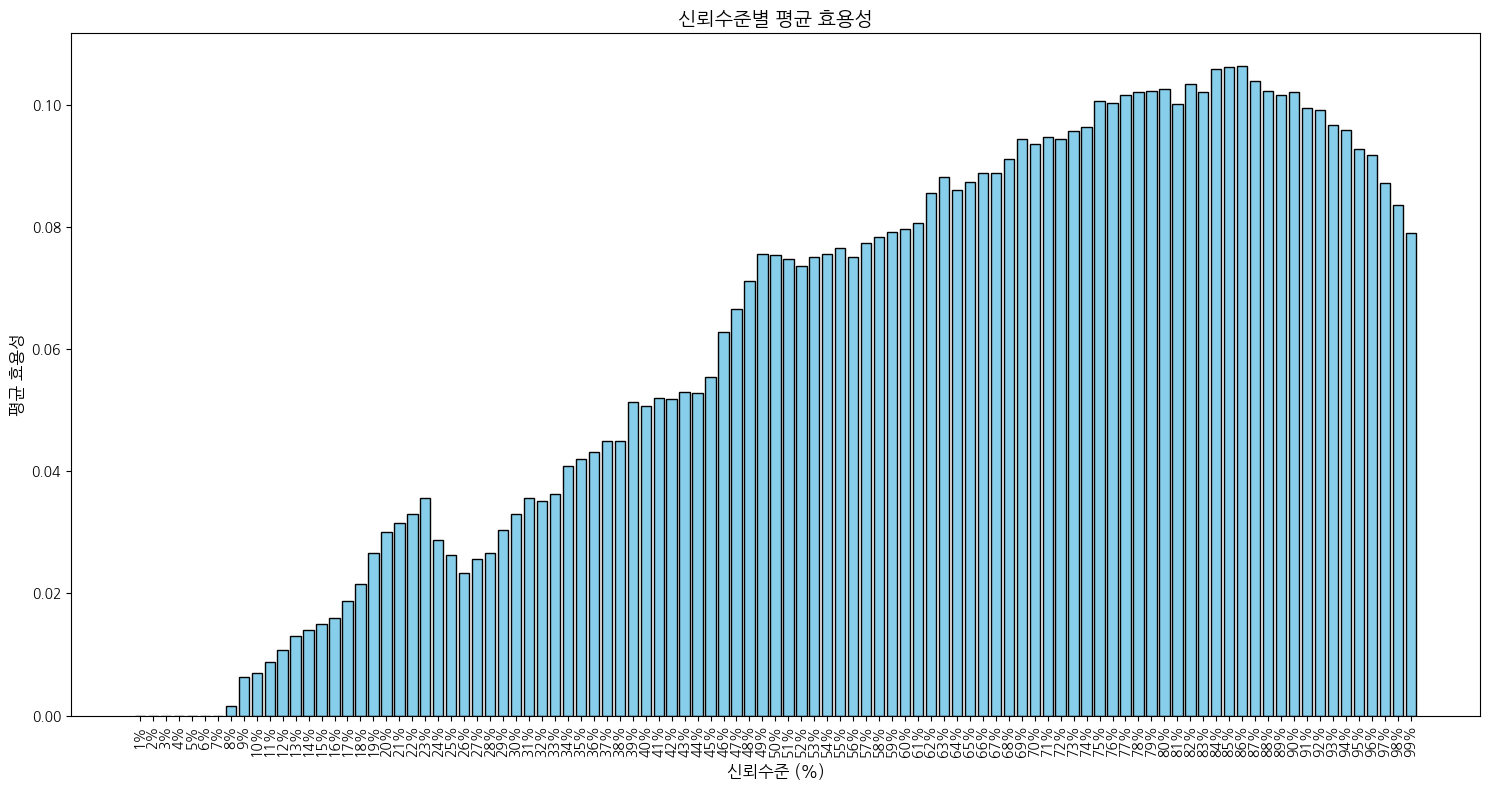

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
from scipy.stats import norm  # 추가된 부분

# 데이터 로드
file_path = "C:/Users/andyj/Desktop/new_file/기후_데이터/SURFACE_ASOS_108_DAY_2023_2023_2024/SURFACE_ASOS_108_DAY_2023_2023_2024.csv"
data = pd.read_csv(file_path, encoding='euc-kr')

# 필요한 열 추출
columns_to_use = [
    '평균기온(°C)', '평균 현지기압(hPa)', '평균 풍속(m/s)', '일강수량(mm)'
]
data = data[columns_to_use]

# 데이터 전처리
data = data.dropna()
data = data[data['일강수량(mm)'] > 0]

# 분석 범위 설정
data_range = {
    '평균기온(°C)': (15, 20),
    '평균 현지기압(hPa)': (1000, 1010),
    '평균 풍속(m/s)': (1, 3)
}

# 샘플 추출 함수
def extract_samples(data, column, range_min, range_max, num_samples=30):
    filtered_data = data[(data[column] >= range_min) & (data[column] <= range_max)]
    return np.random.choice(filtered_data['일강수량(mm)'], num_samples, replace=True)

# 표본 평균 계산
def calculate_sample_mean(samples):
    return np.mean(samples)

# 모평균 계산
def calculate_population_mean(data, column, range_min, range_max):
    filtered_data = data[(data[column] >= range_min) & (data[column] <= range_max)]
    return np.mean(filtered_data['일강수량(mm)'])

# 신뢰구간 계산 함수
def calculate_confidence_interval(data, confidence_level):
    mean = np.mean(data)
    std_dev = np.std(data)
    z_score = norm.ppf((1 + confidence_level) / 2)
    margin_of_error = z_score * (std_dev / np.sqrt(len(data)))
    return mean - margin_of_error, mean + margin_of_error

# 반복 횟수 평가 + 페널티 계산 (확률에 기반한 반복 횟수 계산)
def evaluate_iterations_and_penalty(conf_interval, population_mean, max_iterations=500, precision=0.0001):
    # 신뢰구간 길이 계산
    interval_length = conf_interval[1] - conf_interval[0]
    
    # 길이에 비례하는 확률 계산 (길이가 길수록 낮은 확률)
    probability = 1 / interval_length  # 길이가 길수록 확률은 낮음
    
    # 기하 분포를 따르는 기댓값을 사용하여 반복 횟수 계산
    expected_iterations = 1 / probability
    
    iterations = round(expected_iterations)
    penalty = 0

    # 모평균이 신뢰구간에 들어가지 않을 경우 페널티 부여
    if not (conf_interval[0] <= population_mean <= conf_interval[1]):
        penalty = 1

    return iterations, penalty

# 효용성 계산 함수
def calculate_efficiency(confidence_level, iterations, penalty):
    if iterations == 0:  # 반복 횟수가 0이면 효용성 계산 방지
        return 0
    return confidence_level * (1 / iterations) * (1 - penalty)

# 100번 반복하여 결과 계산
repeat_count = 100
all_results = {confidence_level: [] for confidence_level in range(1, 100)}  # 신뢰수준별 결과 저장

for repeat in range(repeat_count):
    samples = extract_samples(data, '평균기온(°C)', data_range['평균기온(°C)'][0], data_range['평균기온(°C)'][1])
    sample_mean = calculate_sample_mean(samples)
    population_mean = calculate_population_mean(data, '평균기온(°C)', data_range['평균기온(°C)'][0], data_range['평균기온(°C)'][1])

    # 신뢰수준 리스트
    confidence_levels = range(1, 100)
    results = []

    for confidence_level in confidence_levels:
        confidence_interval = calculate_confidence_interval(samples, confidence_level / 100)
        iterations, penalty = evaluate_iterations_and_penalty(confidence_interval, population_mean)
        efficiency = calculate_efficiency(confidence_level / 100, iterations, penalty)

        results.append((confidence_level, iterations, penalty, efficiency))
        all_results[confidence_level].append(efficiency)  # 신뢰수준별 효용성 기록

# 100번 반복 후 각 신뢰수준에 대해 평균 효용성 계산
print("\n100번 반복 후 각 신뢰수준에 대한 평균 효용성:")
efficiency_means = {confidence_level: np.mean(all_results[confidence_level]) for confidence_level in range(1, 100)}

for confidence_level in range(1, 100):
    avg_efficiency = efficiency_means[confidence_level]
    print(f"신뢰수준 {confidence_level}% 평균 효용성: {avg_efficiency:.4f}")

# 신뢰수준과 효용성 값 리스트로 변환
confidence_levels_list = [f'{conf_level}%' for conf_level in range(1, 100)]
efficiency_values_list = list(efficiency_means.values())

# 막대그래프 시각화
plt.figure(figsize=(15, 8))
plt.bar(confidence_levels_list, efficiency_values_list, color='skyblue', edgecolor='black')

# 그래프 제목과 레이블
plt.title('신뢰수준별 평균 효용성', fontsize=14)
plt.xlabel('신뢰수준 (%)', fontsize=12)
plt.ylabel('평균 효용성', fontsize=12)
plt.xticks(rotation=90)  # 신뢰수준 레이블 회전

# 그래프 출력
plt.tight_layout()
plt.show()
